In [25]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


 shape (60000, 28, 28) == 28x28 pixel  , the size of the images


---------------------------------
Displying sample of our data.  
X_train = pics.   
y_train = labels

In [26]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [27]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

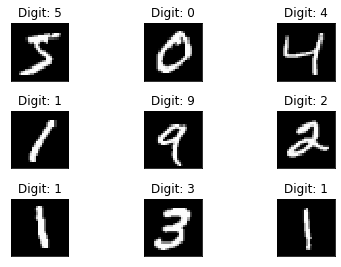

In [29]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

To prepare the data for training we reshape it to vectors of 784 elements, convert to floating point and normalize to be between 0 and 1.

In [30]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


In [31]:
#The training and testing labels are "one hot encoded" to categorical form
print(y_train.shape)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000,)
(60000, 10)


Next it is time to build the artificial neural network. We will have two hidden layers with 512 nodes each and output layer with 10 nodes. All layers are fully connected or "dense". The first hidden layer indicates also the shape of input (here 784). We use ReLU activation in input layer. Dropout rate avoids overfitting by ignoring certain amount of weight updating. The last activation function is the softmax

In [32]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [33]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [34]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=5, verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/5
469/469 - 8s - loss: 0.2507 - accuracy: 0.9250 - val_loss: 0.1055 - val_accuracy: 0.9665 - 8s/epoch - 17ms/step
Epoch 2/5
469/469 - 9s - loss: 0.1005 - accuracy: 0.9686 - val_loss: 0.0816 - val_accuracy: 0.9740 - 9s/epoch - 19ms/step
Epoch 3/5
469/469 - 7s - loss: 0.0720 - accuracy: 0.9772 - val_loss: 0.0759 - val_accuracy: 0.9767 - 7s/epoch - 15ms/step
Epoch 4/5
469/469 - 9s - loss: 0.0559 - accuracy: 0.9820 - val_loss: 0.0912 - val_accuracy: 0.9725 - 9s/epoch - 19ms/step
Epoch 5/5
469/469 - 7s - loss: 0.0464 - accuracy: 0.9852 - val_loss: 0.0720 - val_accuracy: 0.9782 - 7s/epoch - 16ms/step


Here epochs is the number of iterations that the weights are updated. Batch size allows keras to work in parallel for improved speed. Nevertheless this step may take some time and hence it is better to save the trained model to disk using

In [35]:
model.save("mnist_model.h5")

This allows one to repeat prediction step by loading the model from disk first (without training again) and continuing to use the model as it would have been trained again.

In [36]:
model = load_model('mnist_model.h5')

Evaluation is done as follows

In [37]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0720 - accuracy: 0.9782 - 1s/epoch - 3ms/step
Test Loss 0.0719785988330841
Test Accuracy 0.9782000184059143


[[ 967    1    0    1    1    0    3    2    2    3]
 [   0 1110    1    4    0    0    3    5   12    0]
 [   4    1 1000    5    5    0    1    9    6    1]
 [   0    0    0 1004    0    0    0    4    2    0]
 [   1    0    1    1  971    0    2    2    0    4]
 [   3    0    0   32    2  847    4    0    2    2]
 [   1    2    0    1    5    3  944    0    2    0]
 [   0    1    4    1    1    0    0 1014    1    6]
 [   0    1    1    7    8    1    1    3  948    4]
 [   0    2    0    4   20    0    0    5    1  977]]


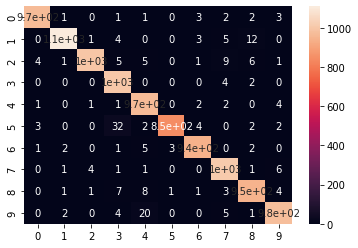

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.95      0.99      0.97      1010
           4       0.96      0.99      0.97       982
           5       1.00      0.95      0.97       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [38]:
predict_x = model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
cm = confusion_matrix(y_test, classes_x)
print(cm)
sn.heatmap(cm, annot=True)
plt.show()
print(classification_report(y_test, classes_x))

we take a look at some of the correct and incorrect predictions

9782  correct predictions
218  incorrect predictions


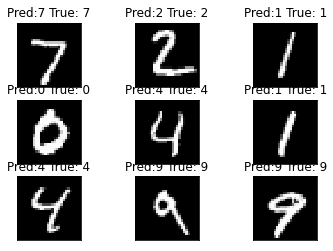

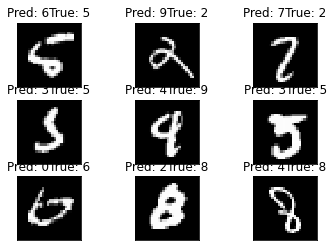

In [39]:
correct_idx = np.nonzero(classes_x == y_test)[0]
incorrect_idx = np.nonzero(classes_x != y_test)[0]
print(len(correct_idx)," correct predictions")
print(len(incorrect_idx)," incorrect predictions")

for i, idx in enumerate(correct_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred:"+str(classes_x[idx])+" True: "+str(y_test[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()

for i, idx in enumerate(incorrect_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: "+str(classes_x[idx])+"True: "+str(y_test[idx]))
    plt.xticks([])
    plt.yticks([])
plt.show()